In [1]:
# 一つ上の階層からモジュールを参照できるようにする
import sys
sys.path.append('..')

In [2]:
# モジュールの変更を自動的に反映する
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from inputs import load_data

In [5]:
train_x, train_y, test_x = load_data()

## Overview

In [8]:
train_x.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,...,2,1331,721,1970,15,1,4,1,0,1
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,...,19,1571,1262,1150,14,16,14,1,0,1
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,...,15,364,721,1970,18,12,11,1,0,1
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,...,4,447,1162,1950,15,3,19,1,0,0
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,...,5,364,1917,1970,16,7,6,1,1,1


In [11]:
train_x.shape

(1200, 21)

In [10]:
test_x.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1203,0,0.498993,1,0,1,40,0.914530,190,...,7,381,721,1970,6,1,2,1,0,1
1,2,1154,0,1.981014,0,1,0,33,0.025999,82,...,10,376,1555,1970,11,7,3,1,0,0
2,6,1027,1,1.647026,0,0,1,32,0.912318,103,...,1,364,1374,1970,17,1,6,1,0,0
3,10,833,0,1.070061,0,0,0,2,0.033010,156,...,0,1331,1710,832,12,8,8,1,1,0
4,12,1027,1,1.859165,0,4,1,2,0.612349,171,...,13,667,1642,2655,14,5,2,1,1,0


In [13]:
test_x.shape

(800, 21)

In [21]:
train_y.value_counts().sort_index() # / train_y.shape[0]

0    212
1    300
2    420
3    268
Name: price_range, dtype: int64

## Check null existence

In [31]:
train_x.isnull().any()

id               False
battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

In [32]:
test_x.isnull().any()

id               False
battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

In [33]:
train_y.isnull().any()

False

## train_y

In [80]:
pd.concat([train_y.value_counts().to_frame('count'),
           (train_y.value_counts() / train_y.shape[0]).to_frame('rate')], axis=1).sort_index()

,count,rate
0,212,0.176667
1,300,0.250000
2,420,0.350000
3,268,0.223333


## train_x vs test_x

In [25]:
train_x.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [26]:
test_x.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

### battery_power

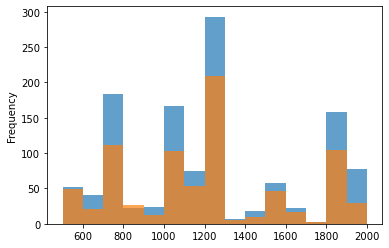

In [46]:
bins = list(range(500, 2001, 100))
_ = train_x['battery_power'].plot.hist(bins=bins, alpha=.7)
_ = test_x['battery_power'].plot.hist(bins=bins, alpha=.7)

### blue

In [8]:
pd.concat([train_x['blue'].value_counts().to_frame('count'),
           (train_x['blue'].value_counts() / train_x.shape[0]).to_frame('rate')], axis=1)

,count,rate
0,710,0.591667
1,490,0.408333


In [62]:
pd.concat([test_x['blue'].value_counts().to_frame('count'),
           (test_x['blue'].value_counts() / test_x.shape[0]).to_frame('rate')], axis=1)

,count,rate
0,477,0.59625
1,323,0.40375


### clock_speed

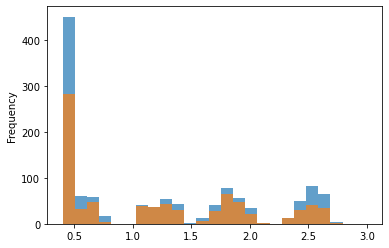

In [81]:
bins = np.linspace(0.4, 3, int((3-0.4)/0.1))
_ = train_x['clock_speed'].plot.hist(bins=bins, alpha=.7)
_ = test_x['clock_speed'].plot.hist(bins=bins, alpha=.7)

### dual_sim

In [90]:
pd.concat([train_x['dual_sim'].value_counts().to_frame('count'),
           (train_x['dual_sim'].value_counts() / train_x.shape[0]).to_frame('rate')], axis=1).sort_index()

,count,rate
0,521,0.434167
1,679,0.565833


In [92]:
pd.concat([test_x['dual_sim'].value_counts().to_frame('count'),
           (test_x['dual_sim'].value_counts() / test_x.shape[0]).to_frame('rate')], axis=1).sort_index()

,count,rate
0,377,0.47125
1,423,0.52875


### fc

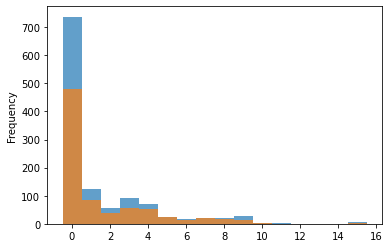

In [131]:
bins = list(range(0, 17, 1))
indices = list(range(0, 17, 2))
ax = train_x['fc'].plot.hist(bins=bins, alpha=.7)
_ = test_x['fc'].plot.hist(bins=bins, alpha=.7)
_ = ax.set_xticks(np.array(bins)[indices]+0.5)
_ = ax.set_xticklabels(np.array(bins)[indices])

### four_g

In [32]:
pd.concat([train_x['four_g'].value_counts().to_frame('count'),
           (train_x['four_g'].value_counts() / train_x.shape[0]).to_frame('rate')], axis=1).sort_index()

,count,rate
0,449,0.374167
1,751,0.625833


In [33]:
pd.concat([test_x['four_g'].value_counts().to_frame('count'),
           (test_x['four_g'].value_counts() / test_x.shape[0]).to_frame('rate')], axis=1).sort_index()

,count,rate
0,318,0.3975
1,482,0.6025


### int_memory

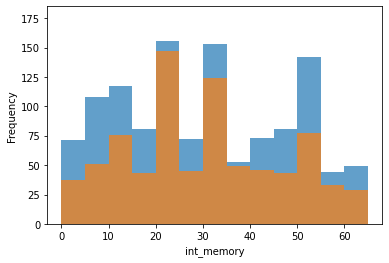

In [31]:
bins = list(range(0, 66, 5))
ax = train_x['int_memory'].plot.hist(bins=bins, alpha=.7)
_ = test_x['int_memory'].plot.hist(bins=bins, alpha=.7)
ax.set_xlabel('int_memory')
ax.set_ylim([0, 185])
_ = ax.set_xlim([-3, 68])

### m_dep

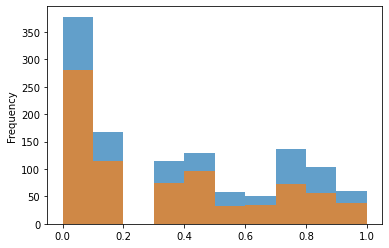

In [14]:
bins = np.linspace(0, 1, 11)
_ = train_x['m_dep'].plot.hist(bins=bins, alpha=.7)
_ = test_x['m_dep'].plot.hist(bins=bins, alpha=.7)

### mobile_wt

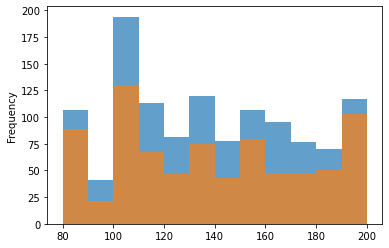

In [19]:
bins = list(range(80, 201, 10))
_ = train_x['mobile_wt'].plot.hist(bins=bins, alpha=.7)
_ = test_x['mobile_wt'].plot.hist(bins=bins, alpha=.7)

### n_cores

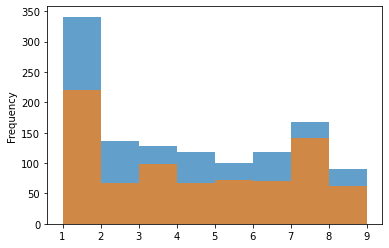

In [34]:
bins = list(range(1, 10, 1))
_ = train_x['n_cores'].plot.hist(bins=bins, alpha=.7)
_ = test_x['n_cores'].plot.hist(bins=bins, alpha=.7)

### pc

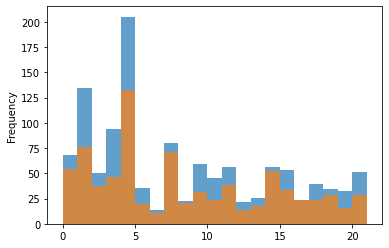

In [43]:
bins = list(range(0, 22, 1))
_ = train_x['pc'].plot.hist(bins=bins, alpha=.7)
_ = test_x['pc'].plot.hist(bins=bins, alpha=.7)

### px_height

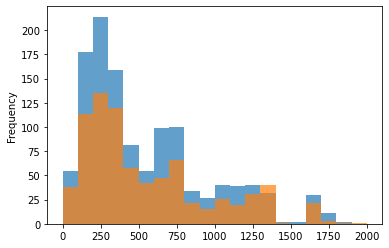

In [49]:
bins = list(range(0, 2001, 100))
_ = train_x['px_height'].plot.hist(bins=bins, alpha=.7)
_ = test_x['px_height'].plot.hist(bins=bins, alpha=.7)

### px_width

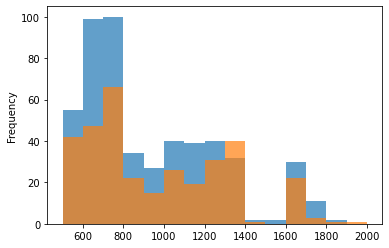

In [50]:
bins = list(range(500, 2001, 100))
_ = train_x['px_height'].plot.hist(bins=bins, alpha=.7)
_ = test_x['px_height'].plot.hist(bins=bins, alpha=.7)

### ram

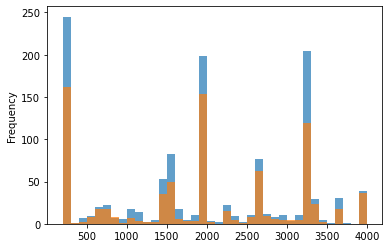

In [54]:
bins = list(range(200, 4001, 100))
_ = train_x['ram'].plot.hist(bins=bins, alpha=.7)
_ = test_x['ram'].plot.hist(bins=bins, alpha=.7)

### sc_h

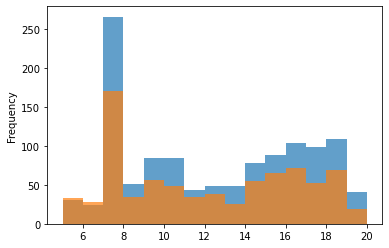

In [59]:
bins = list(range(5, 21, 1))
_ = train_x['sc_h'].plot.hist(bins=bins, alpha=.7)
_ = test_x['sc_h'].plot.hist(bins=bins, alpha=.7)

### sc_w

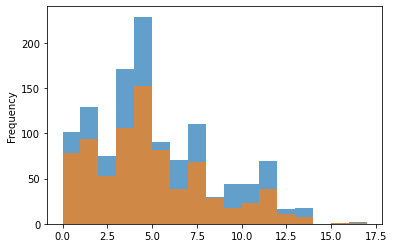

In [62]:
bins = list(range(0, 18, 1))
_ = train_x['sc_w'].plot.hist(bins=bins, alpha=.7)
_ = test_x['sc_w'].plot.hist(bins=bins, alpha=.7)

### talk_time

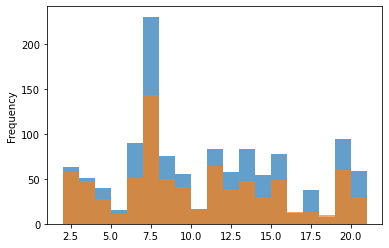

In [65]:
bins = list(range(2, 22, 1))
_ = train_x['talk_time'].plot.hist(bins=bins, alpha=.7)
_ = test_x['talk_time'].plot.hist(bins=bins, alpha=.7)

### three_g

In [68]:
pd.concat([train_x['three_g'].value_counts().to_frame('count'),
           (train_x['three_g'].value_counts() / train_x.shape[0]).to_frame('rate')], axis=1).sort_index()

,count,rate
0,130,0.108333
1,1070,0.891667


In [70]:
pd.concat([test_x['three_g'].value_counts().to_frame('count'),
           (test_x['three_g'].value_counts() / test_x.shape[0]).to_frame('rate')], axis=1).sort_index()

,count,rate
0,91,0.11375
1,709,0.88625


### touch_screen

In [71]:
pd.concat([train_x['touch_screen'].value_counts().to_frame('count'),
           (train_x['touch_screen'].value_counts() / train_x.shape[0]).to_frame('rate')], axis=1).sort_index()

,count,rate
0,707,0.589167
1,493,0.410833


In [72]:
pd.concat([test_x['touch_screen'].value_counts().to_frame('count'),
           (test_x['touch_screen'].value_counts() / test_x.shape[0]).to_frame('rate')], axis=1).sort_index()

,count,rate
0,465,0.58125
1,335,0.41875


### wifi

In [73]:
pd.concat([train_x['wifi'].value_counts().to_frame('count'),
           (train_x['wifi'].value_counts() / train_x.shape[0]).to_frame('rate')], axis=1).sort_index()

,count,rate
0,654,0.545
1,546,0.455


In [74]:
pd.concat([test_x['wifi'].value_counts().to_frame('count'),
           (test_x['wifi'].value_counts() / test_x.shape[0]).to_frame('rate')], axis=1).sort_index()

,count,rate
0,449,0.56125
1,351,0.43875


In [86]:
# four_g と three_g が true かどうかの特徴量
# px_height と sc_h の差（どれくらいのベゼルがあるか）